<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Regression Tutorial SWDB 2018 </h1> 
<h3 align="center">Friday, August 24, 2018</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Machine learning has many canonical problem types that we will discuss in these tutorials.  These include Regression, Classification, Clustering, and Dimension Reduction.  This tutorial is focused on Regression.
</p>
<p>
    Regression is an example of a Supervised Learning problem.  In a regression problem, we are given pairs of data points $(\vec{x}_i, y_i)$ where $i \in [1,N]$.  We want to develop a function $f(\vec{x})$ such that $f(\vec{x}_i)\approx y_i$ for each pair of points in the data set.
    </p>
    <p>
    The simplest regression problem is linear regression, in which we try to create the function $f$ by linearly combining a set of functions that act on the points $x$.

$f(\vec{x}_i) = \sum_j w_j \phi(\vec{x}_i)$

The functions $\phi(\vec{x})$ are chosen according to the analysis.  They are often called "features".  The coefficients $w_j$ are called "weights".

You may be familiar with a version of linear regression where the functions $\phi$ are chosen to be the identity and a constant.  When the input space is one dimensional this is:

$f(x) = w x + b$
</p>
<p>
    This problem is defined by an "error function", whose minimization tries to force the function $f$ to approximate the data points $y_i$ on the inputs $\vec{x}_i$.  This error function is

$E = \frac{1}{2} \sum_i \left | y_i - f\left ( \vec{x}_i \right ) \right |^2 = \frac{1}{2} \sum_i \left | y_i - \sum_j w_j \phi (\vec{x}_i ) \right |^2 $
</p>
<p>
    This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.

The `scikit-learn` website:  http://scikit-learn.org/stable/
</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We're going to provide a simple example with fake data and then use the same model to fit data from the Brain Observatory.  The model we fit will be an $n$th order polynomial of a single variable:
</p>
<p>
$f_n(x) = \sum_{i=0}^n a_i x^i$
</p>
<p>
i.e.
</p>
<p>
$f_1(x) = a_0 + a_1 x$
</p>
<p>
$f_2(x) = a_0 + a_1 x + a_2x^2$
</p>
<p>
$\dots$
</p>
<p>
First we generate some example data using our model.  Let's choose a 3rd order polynomial.  This will be the true model of the data.  (In a real problem, we won't know this function; we're trying to fit it.)
</p>
<p>
$F(x) = sin(2\pi x)$
</p>
</div>

Text(0.5, 0, 'x')

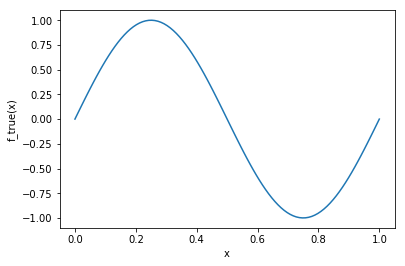

In [2]:
x0 = np.linspace(0,1.0, 100)
#xo just defines the space we are looking over

def f_true(xt): 
    return np.sin(2.0*np.pi*xt)

fig, ax = plt.subplots()
ax.plot(x0, f_true(x0))
ax.set_ylabel('f_true(x)')
ax.set_xlabel('x')
# ax.set_ylim(-15,30)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we generate some 'data' from this function.
    </p>
    </div>

Text(0.5, 0, 'x')

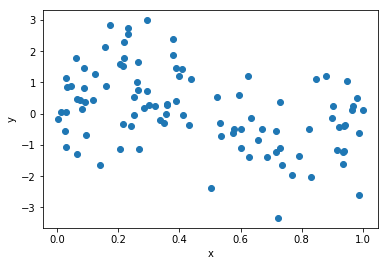

In [4]:
n = 100
#generate random noise normal distributed
x = np.sort(np.random.random(n))
y = f_true(x) + 1.0*np.random.normal(size=n)

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.set_ylabel('y')
ax.set_xlabel('x')
# ax.set_ylim(-40,40)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h3>Fitting a first order polynomial.</h3>
</p>
<p>
Before we fit any models, we need to separate the data into train, validate, and test sets.  This is so that we can train the model (train), perform model comparison (validate), and test the performance of the model (test).
</p>
<p>
`scikit-learn` has a function we can use called `train_test_split`.  We use this function twice in order to generate a validation set.
</p>
</div>

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


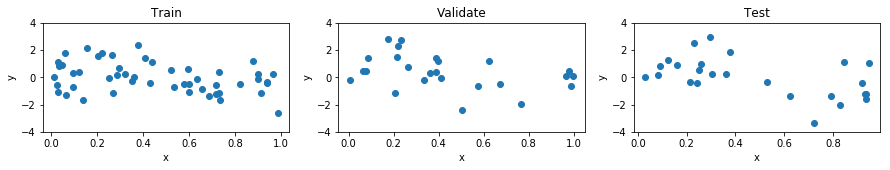

In [5]:
from sklearn.model_selection import train_test_split
#make three different datas sets -- split into training dataset x, training dataset y, then split further into .5 to ultimately 
#split into a quarter of dataset for splitting further
x_train, x_validate, y_train, y_validate = train_test_split(x, y, train_size=0.5)
x_validate, x_test, y_validate, y_test = train_test_split(x_validate, y_validate, test_size=0.5)

fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(x_train, y_train, 'o')
ax[1].plot(x_validate, y_validate, 'o')
ax[2].plot(x_test, y_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-4, 4)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
In ordert to fit the model, we need to create the object that will manage the fitting.  We are going to use the `LinearRegression` model from `sklearn.linear_model`.  Fitting works by calling the `fit` method with the data.
</p>
</div>

In [6]:
from sklearn.linear_model import LinearRegression as LR

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We reshape `x` in the `fit` method because it expects a two dimensional array of shape (samples, dimensions).
</p>
</div>

In [8]:
#create object object has objects and data 
#lr is a class calling for specific LR object
#fit method samples by dimensions
#fit expects 2D array samples x dimensions
#must be shaped to an array of N x 1 instead of 1D array
#use fit for training data
lr = LR()
lr.fit(x_train.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we compare the result to the validation set.
</p>
</div>

(-4, 4)

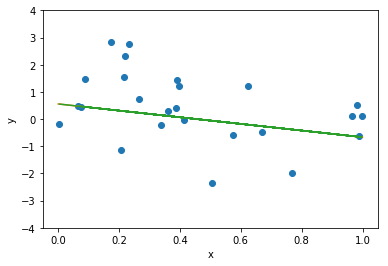

In [11]:
#x0 is just the mesh space 
#be careful of plotting against the training set since it would bias your model estimation -- only looking at your test set
#if model is not working on training set, need to consider your training model.
#workflow -- visualize on validation set, if it looks problematic, go back and see how well it did with your training set to 
#determine how well it works
#use goodness of fit for evaluation
fig, ax = plt.subplots()
ax.plot(x_validate, y_validate, 'o')
ax.plot(x0.reshape(-1,1), lr.predict(x0.reshape(-1,1)), '-')
ax.plot(x_validate.reshape(-1,1), lr.predict(x_validate.reshape(-1,1)), '-')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_ylim(-4,4)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
That doesn't seem right.  Let's try multiple orders of polynomials so that we can compare them with the validation set.
</p>
<p>
     We define a function `nth_polynomial` in order to create input data whose rows are data points and whose columns are the terms in the polynomial ($x$, $x^2$, $x^3$, $\dots$)
</p>
</div>

In [14]:
#function to take data in range and stack to nth power you set stacked onto an axis you specify
def nth_polynomial(x, n):
    return np.stack([x**i for i in range(1, n+1)], axis=1)

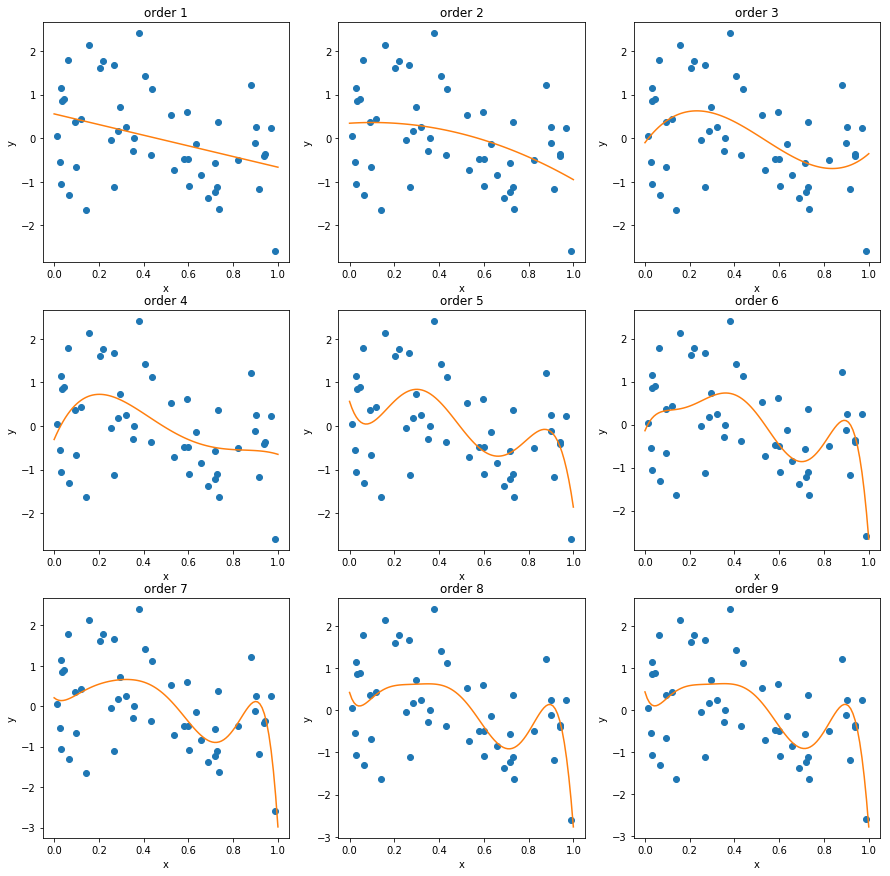

In [15]:
max_order = 9
#make a bunch of linear regression isntances for each order
#do not tell LR the order of the polynomial -- should initialize the same way

lr_list = [LR() for i in range(max_order)]
for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_train, i+1)
    lr.fit(x_nth, y_train)
# make 3x3 array of plots
#plot against training set, where it should fit and perform well -- best possible situation
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    #in python 3, slash always returns a float // is same operator in two and three
    #python 2 / integer division // always meant integer division and rounds floats defaults to truncating floating point part sign dependent
    x_nth = nth_polynomial(x0, i+1)
    ax[yi, xi].plot(x_train, y_train, 'o')
    ax[yi, xi].plot(x0, lr.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we plot them against the validation set.
</p>
</div>

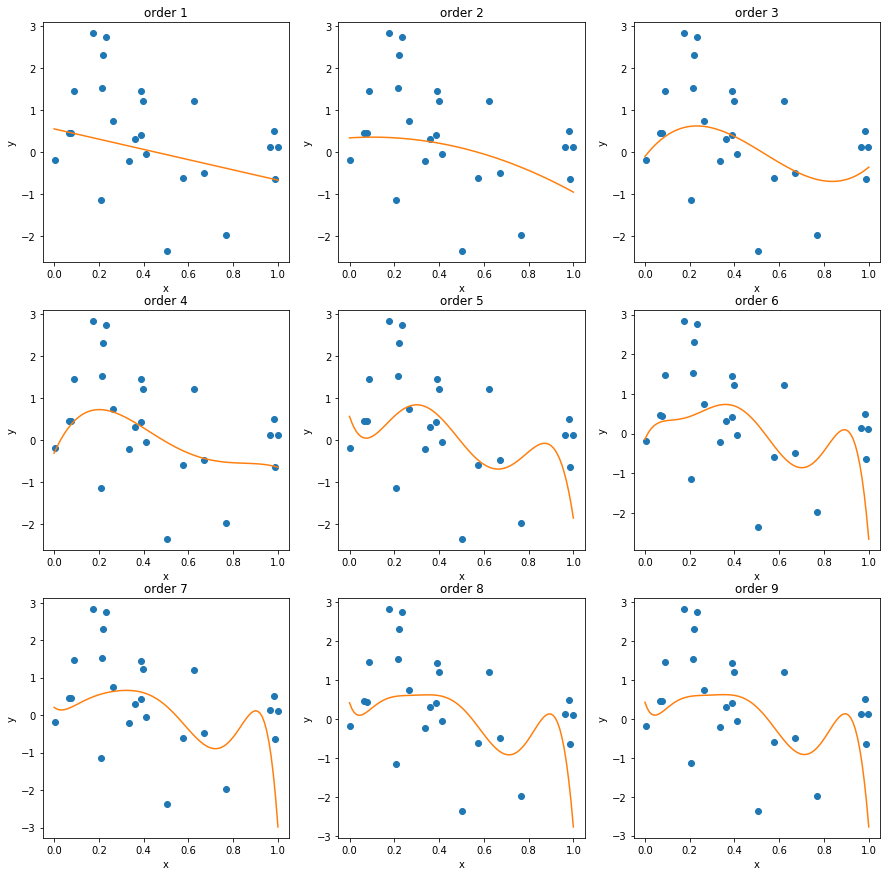

In [18]:
fig, ax = plt.subplots(3,3, figsize=(15,15))
#scikit learn goodness of fit R2 is score 
#calculate on validation set!!!! this is for model assessment
for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i//3
    x_nth = nth_polynomial(x0, i+1)
    ax[yi, xi].plot(x_validate, y_validate, 'o')
    ax[yi, xi].plot(x0, lr.predict(x_nth))
    ax[yi, xi].set_xlabel('x')
    ax[yi, xi].set_ylabel('y')
    ax[yi, xi].set_title('order '+str(i+1))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
To be more precise, we compute the score, which for this model is the $R^2$ of the fit.
</p>
</div>

Text(0.5, 0, 'x_test')

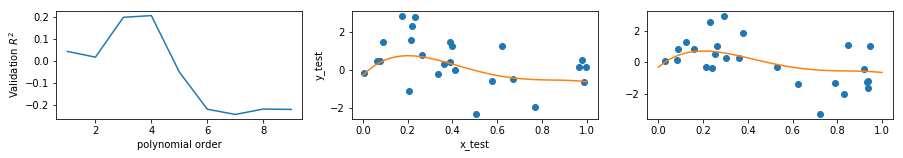

In [19]:
R2_vals = []

for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_validate, i+1)
    R2 = lr.score(x_nth, y_validate)
    R2_vals.append(R2)

order = np.arange(1,max_order+1)
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(x_validate, y_validate, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax[1].plot(x0, lr_best.predict(x_nth))
ax[1].set_ylabel('y_validate')
ax[1].set_xlabel('x_validate')


ax[2].plot(x_test, y_test, 'o')
ax[2].plot(x0, lr_best.predict(x_nth))
ax[1].set_ylabel('y_test')
ax[1].set_xlabel('x_test')
#statsmodels package for linear regression that gives you random stats descriptors for stuff
#sk learn allows you to try different methods on one interface -- general modeling cannot provide general stats across all of the api
#since models generate different statistics
#does not punish for more parameters not adjusted -- might not need to do R2 on adjusted value

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
<h2>Cross validation</h2>
<p>
`scikit-learn` has facilities for making cross-validation quite simple.  Here we show performing cross_validation with the functions `cross_validate` and `KFold`.  `cross_validate` performs cross validation and returns a dictionary of scores over folds.  `KFold` provides an iterator that produces indices that split the data into train and test folds.
</p>
<p>
In the following, we'll ignore the data set we labeled "validate" above.  This is just for simplicity, so I don't have extra code recreating data sets.  The data being used for validation here is part of the cross validation separation of the training set in the code below.
</p>
</div>

In [20]:
from sklearn.model_selection import cross_validate

Text(0.5,0,'polynomial order')

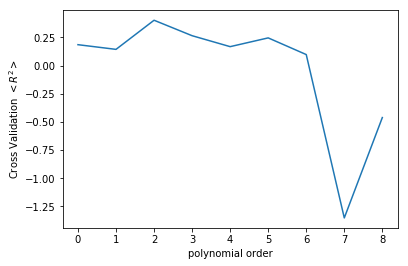

In [19]:
cv_mean_error = np.zeros_like(lr_list)
#cross validation is not randomly sampled points randomly tested a bunch of times.
#partitions data into samples of validation and tests sets within the training and takes average of performance from all pairings
#bias variance tradeoff -- less data in training set, deal more with generalizability 
#think about selection of N folds
for i, lr in enumerate(lr_list):
    x_nth = nth_polynomial(x_train, i+1)
    cv_dict = cross_validate(lr, x_nth, y_train, cv=4)
    cv_mean_error[i] = np.mean(cv_dict['test_score'])
    
fig, ax = plt.subplots()
ax.plot(cv_mean_error)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')
#ax.set_ylim(-0.25,0.25)
#cross validate has thing.score and thing.fit that it can do
#if your thing doesn't have .score and .fit, k fold gives you more flexibility in processing if you have different ways of wanting to validate your dataset

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We can do the same analysis with `KFold`.
</p>
</div>

In [21]:
from sklearn.model_selection import KFold

Text(0.5, 0, 'polynomial order')

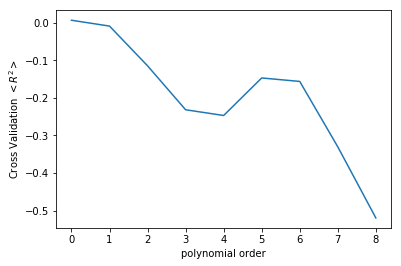

In [22]:
#generate indices to generateindices for test and train datasets
#gives you object to iterate through and returns indices you can use for test set
#you define the number of splits
folds = KFold(n_splits=4)

scores = np.zeros_like(lr_list)

for i, lr in enumerate(lr_list):
    scores_temp = []
    for train, test in folds.split(x_train):
        x_nth = nth_polynomial(x_train[train], i+1)
        lr.fit(x_nth, y_train[train])
        x_nth = nth_polynomial(x_train[test], i+1)
        scores_temp.append(lr.score(x_nth, y_train[test]))
    scores[i] = np.mean(scores_temp)
        

fig, ax = plt.subplots()
ax.plot(scores)
ax.set_ylabel('Cross Validation $<R^2>$')
ax.set_xlabel('polynomial order')
# ax.set_ylim(-0.25, 0.25)
#get best model by taking top of cross validation curve

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now that we know the best model, we can apply it to the test data.
</p>
</div>

Text(0.5, 0, 'x_test')

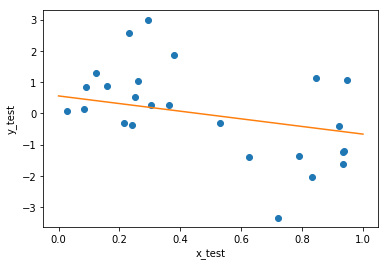

In [23]:
#for model comparison and model evaluation, need to have some form of three data sets -- training, validation, and test sets
#extreme version is doing cross validation twice -- loop of cross validation for testing model
#for each cross validation, iterate through each training set from cross validation algorithm for determining fit
#random sampling will give you typical dataset, extreme values not represented
best_model_index = np.argmax(scores)
lr_best = lr_list[best_model_index]
x_nth = nth_polynomial(x_train, best_model_index+1)
lr_best.fit(x_nth, y_train)
#best fit, take x train, and fitting model again
fig, ax = plt.subplots()
ax.plot(x_test, y_test, 'o')
x_nth = nth_polynomial(x0, best_model_index+1)
ax.plot(x0, lr_best.predict(x_nth))
ax.set_ylabel('y_test')
ax.set_xlabel('x_test')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now let's try a simple example with the Allen Brain Observatory.  We will try regressing the neural activity (using dF/F) against the running speed of the animal.  
</p>
</div>

In [24]:
#make sure your drive path is correct! 
# macOS/OS X
# drive_path = '/Volumes/Brain2018/visual_coding_2p/'

# Windows (a good guess)
# drive_path = 'e:/visual_coding_2p'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2018/visual_coding_2p'

# AWS
drive_path = '/data/allen-brain-observatory/visual-coding-2p'

In [25]:
MANIFEST_FILE = os.path.join(drive_path, 'manifest.json')

In [26]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [27]:
boc = BrainObservatoryCache(manifest_file=MANIFEST_FILE)

In [28]:
exp_cont = boc.get_experiment_containers(ids=[571684731])

In [29]:
container_id = 564425775
cell_id = 570927732

# container_id = 571684731
# cell_id = 572611384

In [30]:
eid = boc.get_ophys_experiments(session_types=['three_session_A'], experiment_container_ids=[container_id])[0]['id']
data = boc.get_ophys_experiment_data(eid)
cell = data.get_cell_specimen_indices([cell_id])[0]

In [31]:
dx, time = data.get_running_speed()

L = dx.shape[0]

dx_train = dx[:L/2]
dx_validate = dx[L/2:3*L/4]
dx_test = dx[3*L/4:]

time, dff = data.get_dff_traces()

dff_train = dff[:,:L/2]
dff_validate = dff[:,L/2:3*L/4]
dff_test = dff[:,3*L/4:]

print((L, dff.shape[1]))

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
fig, ax = plt.subplots()
ax.plot(dx)
ax.set_ylabel('speed (cm/s)')
ax.set_xlabel('acquisition frame')

In [ ]:
fig, ax = plt.subplots()
ax.plot(dx_train, dff_train[cell],'o', label='train')
ax.plot(dx_validate, dff_validate[cell],'o',alpha=0.25, label='validate')
ax.plot(dx_test, dff_test[cell],'o',alpha=0.25, label='test')
ax.set_ylabel('Response (dF/f)')
ax.set_xlabel('Running Speed (cm/s)')

In [ ]:
def downsample(a, bin_edges, alt_array=None):
    n = len(bin_edges)-1
    a_downsampled = np.zeros(n)
    if alt_array is not None:
        alt_downsampled_list = [np.zeros(n) for t in alt_array]
    for i in range(n):
        lower = bin_edges[i]
        upper = bin_edges[i+1]
        bin_mask = np.logical_and(a >= lower, a < upper)
        a_downsampled[i] = np.mean(a[bin_mask])
        if alt_array is not None:
            for j in range(len(alt_array)):
                alt_downsampled_list[j][i] = np.mean(alt_array[j][bin_mask])
            # alt_downsampled[i] = [np.mean(alt_array[bin_mask])
        
    if alt_array is not None:
        return a_downsampled, alt_downsampled_list
    else:
        return a_downsampled

In [ ]:
bin_edges = np.linspace(0,18,100)

running_ds_train, dff_ds_train = downsample(dx_train, bin_edges, [dff_train[cell]])
running_ds_validate, dff_ds_validate = downsample(dx_validate, bin_edges, [dff_validate[cell]])
running_ds_test, dff_ds_test = downsample(dx_test, bin_edges, [dff_test[cell]])

dff_ds_train = dff_ds_train[0]
dff_ds_validate = dff_ds_validate[0]
dff_ds_test = dff_ds_test[0]

NameError: name 'running_ds_train' is not defined

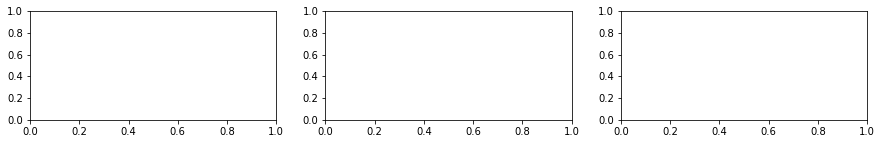

In [32]:
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(running_ds_train, dff_ds_train, 'o')
ax[1].plot(running_ds_validate, dff_ds_validate, 'o')
ax[2].plot(running_ds_test, dff_ds_test, 'o')

ax[0].set_title('Train')
ax[1].set_title('Validate')
ax[2].set_title('Test')

for i in range(3):
    ax[i].set_ylim(-0.1, 0.3)
    ax[i].set_xlabel('Running Speed (cm/s)')
    ax[i].set_ylabel('Response (dF/f)')

In [33]:
lr_order1 = LR()
lr_order1.fit(running_ds_train.reshape(-1,1), dff_ds_train)

NameError: name 'running_ds_train' is not defined

In [34]:
lr_order1.intercept_, lr_order1.coef_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

NameError: name 'running_ds_train' is not defined

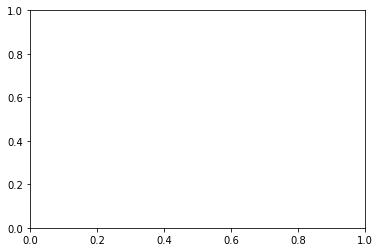

In [35]:
x = np.linspace(0,18,200)

fig, ax = plt.subplots()
ax.plot(running_ds_train, dff_ds_train, 'o')
ax.plot(running_ds_train.reshape(-1,1), lr_order1.predict(running_ds_train.reshape(-1,1)))
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')

In [36]:
max_order = 9

lr_list = [LR() for i in range(max_order)]
for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_ds_train, i+1)
    lr.fit(running_nth_order, dff_ds_train)

NameError: name 'running_ds_train' is not defined

NameError: name 'running_ds_train' is not defined

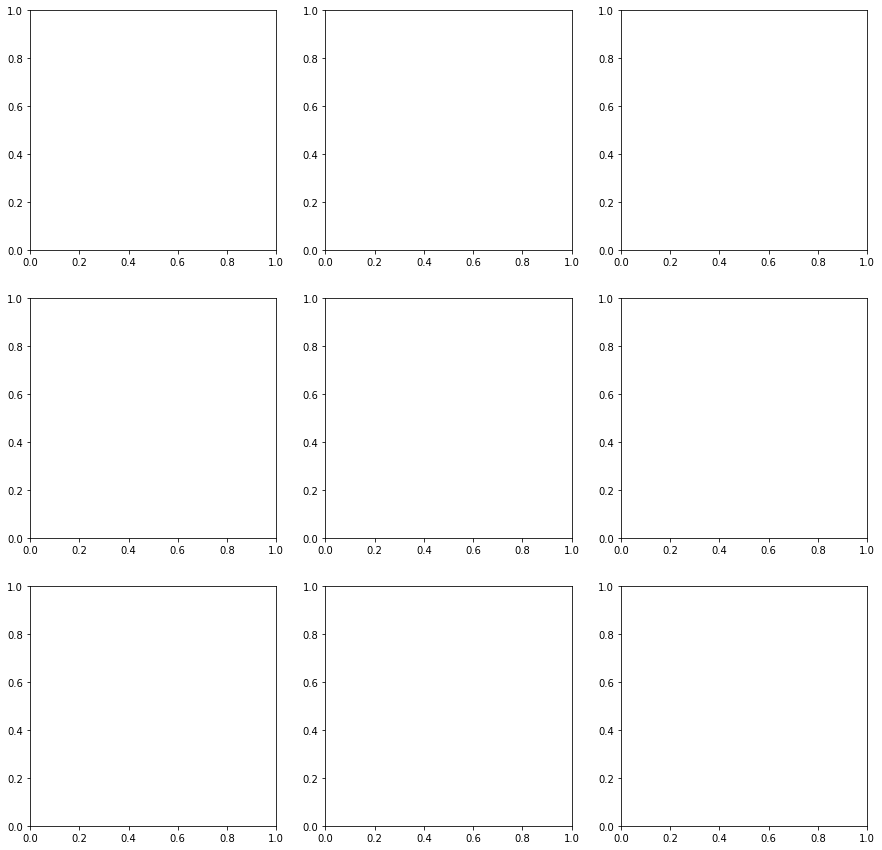

In [37]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i/3
    running_nth_order = nth_polynomial(running_ds_train, i+1)
    ax[yi, xi].plot(running_ds_train, dff_ds_train, 'o')
    ax[yi, xi].plot(running_ds_train, lr.predict(running_nth_order))
    ax[yi, xi].set_xlabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylabel('Response (dF/f)')

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i, lr in enumerate(lr_list):
    xi = i%3
    yi = i/3
    ax[yi, xi].plot(running_ds_validate, dff_ds_validate, 'o')
    running_nth_order = nth_polynomial(running_ds_validate, i+1)
    ax[yi, xi].plot(running_ds_validate, lr.predict(running_nth_order))
    ax[yi, xi].set_xlabel('Running Speed (cm/s)')
    ax[yi, xi].set_ylabel('Response (dF/f)')

In [38]:
np.where(np.isnan(running_ds_test))

NameError: name 'running_ds_test' is not defined

(-0.1, 0.2)

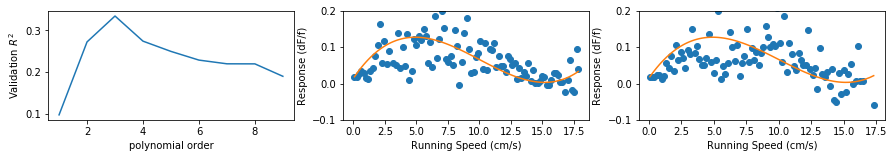

In [53]:
R2_vals = []

for i, lr in enumerate(lr_list):
    running_nth_order = nth_polynomial(running_ds_validate, i+1)
    R2 = lr.score(running_nth_order, dff_ds_validate)
    R2_vals.append(R2)
    
order = np.arange(1,len(R2_vals)+1)
    
fig, ax = plt.subplots(1,3, figsize=(15,2))
ax[0].plot(order, R2_vals)
ax[0].set_ylabel('Validation $R^2$')
ax[0].set_xlabel('polynomial order')

best_model_index = np.argmax(R2_vals)
lr_best = lr_list[best_model_index]

ax[1].plot(running_ds_validate, dff_ds_validate, 'o')
running_nth_order = nth_polynomial(running_ds_validate, best_model_index+1)
ax[1].plot(running_ds_validate, lr_best.predict(running_nth_order))
ax[1].set_xlabel('Running Speed (cm/s)')
ax[1].set_ylabel('Response (dF/f)')
ax[1].set_ylim(-0.1, 0.2)

ax[2].plot(running_ds_test, dff_ds_test, 'o')
running_nth_order = nth_polynomial(running_ds_test[np.isfinite(running_ds_test)], best_model_index+1)
ax[2].plot(running_ds_test[np.isfinite(running_ds_test)], lr_best.predict(running_nth_order))
ax[2].set_xlabel('Running Speed (cm/s)')
ax[2].set_ylabel('Response (dF/f)')
ax[2].set_ylim(-0.1, 0.2)

In [48]:
running_nth_order = nth_polynomial(running_ds_test[np.isfinite(running_ds_test)], best_model_index+1)
print(lr_best.score(running_nth_order, dff_ds_test[np.isfinite(running_ds_test)]))

-0.11702564633


Text(0,0.5,'Response (dF/f)')

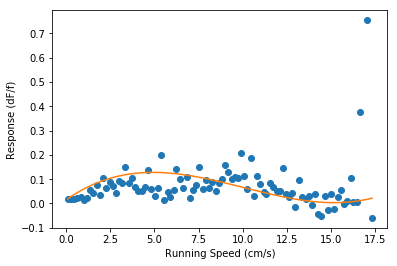

In [54]:
fig, ax = plt.subplots()

ax.plot(running_ds_test, dff_ds_test, 'o')
running_nth_order = nth_polynomial(running_ds_test[np.isfinite(running_ds_test)], best_model_index+1)
ax.plot(running_ds_test[np.isfinite(running_ds_test)], lr_best.predict(running_nth_order))
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')

0.05232844339132148


/Users/michaelbu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Response (dF/f)')

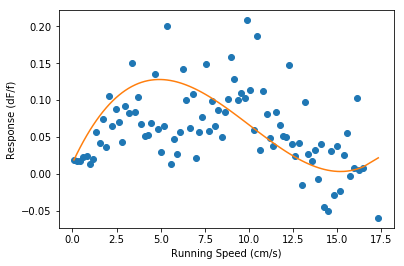

In [55]:
outlier_mask = dff_ds_test < 0.3
running_ds_test_g = running_ds_test[outlier_mask]
dff_ds_test_g = dff_ds_test[outlier_mask]

running_nth_order = nth_polynomial(running_ds_test_g, best_model_index+1)
print(lr_best.score(running_nth_order, dff_ds_test_g))

fig, ax = plt.subplots()

ax.plot(running_ds_test_g, dff_ds_test_g, 'o')
ax.plot(running_ds_test_g, lr_best.predict(running_nth_order))
ax.set_xlabel('Running Speed (cm/s)')
ax.set_ylabel('Response (dF/f)')